In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
img=cv2.imread('audi.png.jpg')
newimg=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

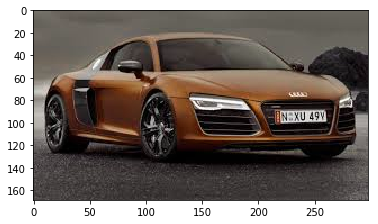

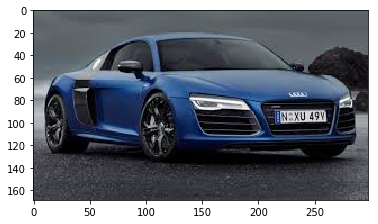

In [3]:
plt.imshow(img)
plt.show()
plt.imshow(newimg)
plt.show()

In [4]:
import cv2
cap=cv2.VideoCapture(0)
while True:
    ret,frame=cap.read()
    
    if ret==False:
        continue
    
    cv2.imshow("Vedio Frame",frame)
    
    key_pressed=cv2.waitKey(1) & 0xFF
    if key_pressed == ord('q'):
        break

        
cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier("C:/Users/Neha Yadav/Anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml")

skip=0
face_data=[]
dataset_path='./data/'
file_name=input("Enter the name of person:")

while True:
    ret,frame=cap.read()
    
    if ret==False:
        continue
        
    faces = face_cascade.detectMultiScale(frame,1.3,5)
    faces = sorted(faces,key=lambda f:f[2]*f[3])
    
    #Pick the largest face beacuse it is the biggest
    for (x,y,w,h) in faces[-1:]:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        #Extract region of interest
        offset=10
        face_section=frame[y-offset:y+h+offset,x-offset:x+w+offset]
        face_section=cv2.resize(face_section,(100,100))
        
        skip+=1
        if(skip%10==0):
            face_data.append(face_section)
            print(len(face_data))
            
        
    
    cv2.imshow("Video Frame",frame)
    cv2.imshow("Face section",face_section)
    
    key_pressed=cv2.waitKey(1) & 0xFF
    if key_pressed == ord('q'):
        break

##CONVERT FACE LIST INTO NUMPY ARRAY

face_data=np.asarray(face_data)
face_data=face_data.reshape((face_data.shape[0],-1))

##SAVE THIS DATA

np.save(dataset_path+file_name+'.npy',face_data)
print("Data Succesfully Saved")
cap.release()
cv2.destroyAllWindows()

In [2]:
import cv2
cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier("C:/Users/Neha Yadav/Anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml")

while True:
    ret,frame=cap.read()
    
    if ret==False:
        continue
    
    faces = face_cascade.detectMultiScale(frame,1.3,5)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    
    
    cv2.imshow("Video Frame",frame)
    
    key_pressed=cv2.waitKey(1) & 0xFF
    if key_pressed == ord('q'):
        break

        
cap.release()
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np
import os

def distance(v1,v2):
    return np.sqrt(((v1-v2)**2).sum())

def knn(train,test,k=5):
    dist=[] 
    for i in range(train.shape[0]):
        ix=train[i,:-1]
        iy=train[i, -1]
        
        d=distance(test,ix)
        dist.append([d,iy])
        
    dk=sorted(dist,key=lambda x:x[0])[:k]
    
    labels=np.array(dk)[:,-1]
    
    output=np.unique(labels,return_counts=True)
    
    index=np.argmax(output[1])
    return output[0][index]

#====================================


cap=cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier("C:/Users/Neha Yadav/Anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml")
skip=0
face_data=[]
labels=[]
class_id=0
names={}
dataset_path="./data/"


for fx in os.listdir(dataset_path):
    if fx.endswith('.npy'):
        names[class_id]=fx[:-4]
        data_item = np.load(dataset_path+fx)
        face_data.append(data_item)
        
        target=class_id*np.ones((data_item.shape[0],))
        class_id+=1
        labels.append(target)
#         print(data_item.shape)
#         print(target.shape)
#         print(target)
        

# print(face_dataset.shape)
# print(face_labels.shape)
face_dataset =np.concatenate(face_data,axis=0)
face_labels=np.concatenate(labels,axis=0).reshape((-1,1))
# print(face_dataset.shape)
# print(face_labels.shape)
trainset=np.concatenate((face_dataset,face_labels),axis=1)


while True:
    ret,frame=cap.read()
    
    gray_frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    if ret == False:
        continue
    
    faces=face_cascade.detectMultiScale(gray_frame,1.3,5)
    faces=sorted(faces,key=lambda f:f[2]*f[3],reverse=True)
   
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        
        offset=10;
        face_section=frame[y-offset:y+h+offset,x-offset:x+w+offset]
        face_section=cv2.resize(face_section,(100,100))
        
        out=knn(trainset,face_section.flatten())
        
        pred_name = names[int(out)]
        cv2.putText(frame,pred_name,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2,cv2.LINE_AA)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        
    cv2.imshow("FACES",frame)
    
    keyPress=cv2.waitKey(1) & 0xFF
    if keyPress == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()